In [1]:
from typing_extensions import TypedDict

class Main(TypedDict):
    graph_info:str
    

In [14]:
def start_play(state:Main):
    print("play node is start")
    return {"graph_info":state["graph_info"]+", I am planning to play"}

def kabbadi(state:Main):
    print("kabaddi node is start")
    return {"graph_info":state["graph_info"]+"kabbadi"}

def kho_kho(state:Main):
    print("kho_kho node is start")
    return {"graph_info":state["graph_info"]+"kho_kho"}



In [15]:
import random 
from typing import Literal

def random_play(state:Main)-> Literal["kabbadi","kho_kho"]:
    if random.random() >0.5:
        return "kabbadi"
    else:
        return "kho_kho"
    
    

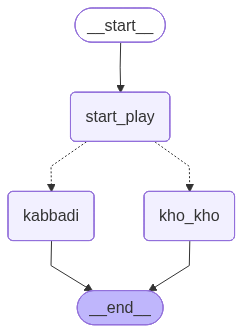

In [17]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

# building graph
graph=StateGraph(Main)


# add all the nodes
graph.add_node("start_play",start_play)
graph.add_node("kabbadi",kabbadi)
graph.add_node("kho_kho",kho_kho)


# schedule the flow of hte graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("kabbadi",END)
graph.add_edge("kho_kho",END)


# compile the graph
entire_graph=graph.compile()


# view
display(Image(entire_graph.get_graph().draw_mermaid_png()))




In [31]:
entire_graph.invoke({'graph_info':"My name is Raviteja"})

play node is start
kabaddi node is start


{'graph_info': 'My name is Raviteja, I am planning to playkabbadi'}